<a href="https://colab.research.google.com/github/zubeydeulukok/CNN_Projects/blob/main/VGG16_ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **IMAGENET - VGG16 - OBJECT DETECTION**


---



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import os 
os.chdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN")

In [3]:
!ls

CNN_1.ipynb  fashion_mnist1.h5	  VGG16_ObjectDetection.ipynb
drive	     Fashion_MNIST.ipynb


In [4]:
import numpy as np
from PIL import Image

# VGG16

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [6]:
model = VGG16(weights = 'imagenet', include_top=True)
model

553467096/553467096 [==============================] - 35s 0us/step


In [7]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model

## Layers

In [8]:
model.layers

In [9]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_2': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [10]:
len(layers)

23

In [11]:
layers['block1_conv1']

<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>

## Weights

In [12]:
#the number of all parameters
model.count_params()

138357544

In [13]:
len(model.weights)

32

In [14]:
model.weights[1]

<tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32, numpy=
array([ 0.73429835,  0.09340367,  0.06775674,  0.8862966 ,  0.25994542,
        0.66426694, -0.01582893,  0.3249065 ,  0.68600726,  0.06247932,
        0.58156496,  0.2361475 ,  0.69694996,  0.19451167,  0.4858922 ,
        0.44571847,  0.5113422 ,  0.208576  ,  0.57557714,  0.33199573,
        0.4997983 ,  0.7117759 ,  0.30284074,  0.7082712 ,  0.04548979,
        0.7446502 ,  0.29845494,  0.48211655,  0.81658626,  0.62603897,
        0.3768093 ,  2.064037  ,  0.77311045,  0.3459577 ,  0.6130958 ,
        0.65459156,  0.39045632,  0.50869167,  0.2625384 ,  0.23669638,
        0.07971057,  1.1179353 ,  0.26129362,  0.8697589 ,  0.21543622,
        0.78007823,  0.37015367,  0.47993386,  0.4313978 ,  0.5084194 ,
        0.23049663,  0.7636527 ,  0.35419866,  0.45794216,  0.4662595 ,
        0.09850298,  0.3803252 ,  0.66880196,  0.4015123 ,  0.90510356,
        0.43166816,  1.302014  ,  0.5306885 ,  0.48993504], dtype=f

In [15]:
type(model.weights[1])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [16]:
# for i in model.weights[1]:
#   print(i)

In [17]:
model.weights[1].shape

TensorShape([64])

In [18]:
model.weights[1].name

'block1_conv1/bias:0'

In [19]:
model.weights[1].numpy()  # weights

array([ 0.73429835,  0.09340367,  0.06775674,  0.8862966 ,  0.25994542,
        0.66426694, -0.01582893,  0.3249065 ,  0.68600726,  0.06247932,
        0.58156496,  0.2361475 ,  0.69694996,  0.19451167,  0.4858922 ,
        0.44571847,  0.5113422 ,  0.208576  ,  0.57557714,  0.33199573,
        0.4997983 ,  0.7117759 ,  0.30284074,  0.7082712 ,  0.04548979,
        0.7446502 ,  0.29845494,  0.48211655,  0.81658626,  0.62603897,
        0.3768093 ,  2.064037  ,  0.77311045,  0.3459577 ,  0.6130958 ,
        0.65459156,  0.39045632,  0.50869167,  0.2625384 ,  0.23669638,
        0.07971057,  1.1179353 ,  0.26129362,  0.8697589 ,  0.21543622,
        0.78007823,  0.37015367,  0.47993386,  0.4313978 ,  0.5084194 ,
        0.23049663,  0.7636527 ,  0.35419866,  0.45794216,  0.4662595 ,
        0.09850298,  0.3803252 ,  0.66880196,  0.4015123 ,  0.90510356,
        0.43166816,  1.302014  ,  0.5306885 ,  0.48993504], dtype=float32)

In [20]:
model.weights[1].dtype

tf.float32

## Prediction

In [23]:
import os
os.chdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images")
!pwd

/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images


In [24]:
!ls

buffalo1.jpg  cat1.jpg	cat3.jpg  cow2.jpg    flowers.jpg
buffalo2.jpg  cat2.jpg	cow1.jpg  daisy1.jpg


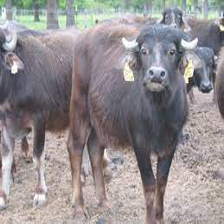

In [26]:
image_path = 'buffalo1.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))  # the input shape of model VGG16
image

In [35]:
x = np.array(image, dtype = 'float32') # convert image into an array
x = np.expand_dims(x, axis=0) # dizi listesine çevirir
x.shape

(1, 224, 224, 3)

In [36]:
x= preprocess_input(x)

In [41]:
pred = model.predict(x)
print('predicted:', decode_predictions(pred, top=3)[0])
print(decode_predictions(pred, top=1)[0][0][1])

1/1 [==============================] - 0s 16ms/step
predicted: [('n02403003', 'ox', 0.35084155), ('n02408429', 'water_buffalo', 0.3090932), ('n03868242', 'oxcart', 0.14350665)]
ox


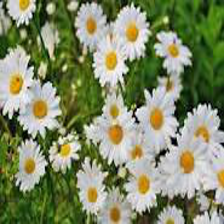

In [50]:
image_path = 'daisy2.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [51]:
x = np.array(image, dtype = 'float32') # convert image into an array
x = np.expand_dims(x, axis=0) # dizi listesine çevirir
x= preprocess_input(x)

In [52]:
pred2 = model.predict(x)
print('predicted:', decode_predictions(pred2, top=3)[0])
print(decode_predictions(pred2, top=1)[0][0][1])

1/1 [==============================] - 0s 15ms/step
predicted: [('n11939491', 'daisy', 0.99650145), ('n02206856', 'bee', 0.0004792647), ('n03930313', 'picket_fence', 0.00038708758)]
daisy


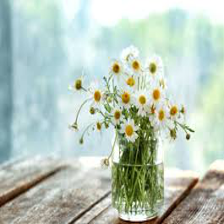

In [53]:
image_path = 'daisy1.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [56]:
x = np.array(image, dtype = 'float32') # convert image into an array
x = np.expand_dims(x, axis=0)
x= preprocess_input(x)

In [57]:
pred3 = model.predict(x)
print('predicted:', decode_predictions(pred3, top=3)[0])
print(decode_predictions(pred3, top=1)[0][0][1])

1/1 [==============================] - 0s 14ms/step
predicted: [('n04522168', 'vase', 0.12624536), ('n02226429', 'grasshopper', 0.08007909), ('n02229544', 'cricket', 0.078421935)]
vase


In [58]:
!pwd

/gdrive/MyDrive/BTK-Keras ile derin öğrenmeye giriş/CNN/images


In [62]:
images = os.listdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images")
images

['cat2.jpg',
 'cat1.jpg',
 'cow1.jpg',
 'cat3.jpg',
 'daisy1.jpg',
 'buffalo2.jpg',
 'cow2.jpg',
 'flowers.jpg',
 'buffalo1.jpg',
 'daisy2.jpg']

In [63]:
for i in images:
  image = Image.open(i) 
  image = image.resize((224, 224))
  x = np.array(image, dtype = 'float32') 
  x = np.expand_dims(x, axis=0)
  x= preprocess_input(x)    
  pred = model.predict(x)
  print('predicted:', decode_predictions(pred, top=3)[0])
  print(decode_predictions(pred, top=1)[0][0][1])

1/1 [==============================] - 0s 16ms/step
predicted: [('n02123159', 'tiger_cat', 0.30409324), ('n02441942', 'weasel', 0.16157097), ('n02124075', 'Egyptian_cat', 0.122506164)]
tiger_cat
1/1 [==============================] - 0s 15ms/step
predicted: [('n02123045', 'tabby', 0.32258603), ('n02123159', 'tiger_cat', 0.12815529), ('n02124075', 'Egyptian_cat', 0.07970744)]
tabby
1/1 [==============================] - 0s 15ms/step
predicted: [('n02403003', 'ox', 0.7840046), ('n01518878', 'ostrich', 0.084533155), ('n02410509', 'bison', 0.06864283)]
ox
1/1 [==============================] - 0s 17ms/step
predicted: [('n02124075', 'Egyptian_cat', 0.5495563), ('n02123045', 'tabby', 0.17361133), ('n02123159', 'tiger_cat', 0.08214273)]
Egyptian_cat
1/1 [==============================] - 0s 13ms/step
predicted: [('n04522168', 'vase', 0.12624536), ('n02226429', 'grasshopper', 0.08007909), ('n02229544', 'cricket', 0.078421935)]
vase
1/1 [==============================] - 0s 16ms/step
predicted: